In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [74]:
df = pd.read_csv('Position_Salaries.csv')
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [75]:
df.sample(5)

,Position,Level,Salary
1,Junior Consultant,2,50000
0,Business Analyst,1,45000
3,Manager,4,80000
8,C-level,9,500000
6,Partner,7,200000


In [76]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [77]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_3256\2650972040.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


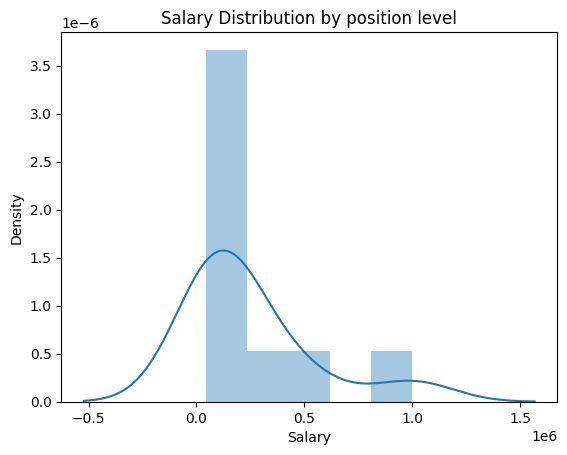

In [78]:
# data distribution
plt.title('Salary Distribution by position level')
sns.distplot(df['Salary'])
plt.show()

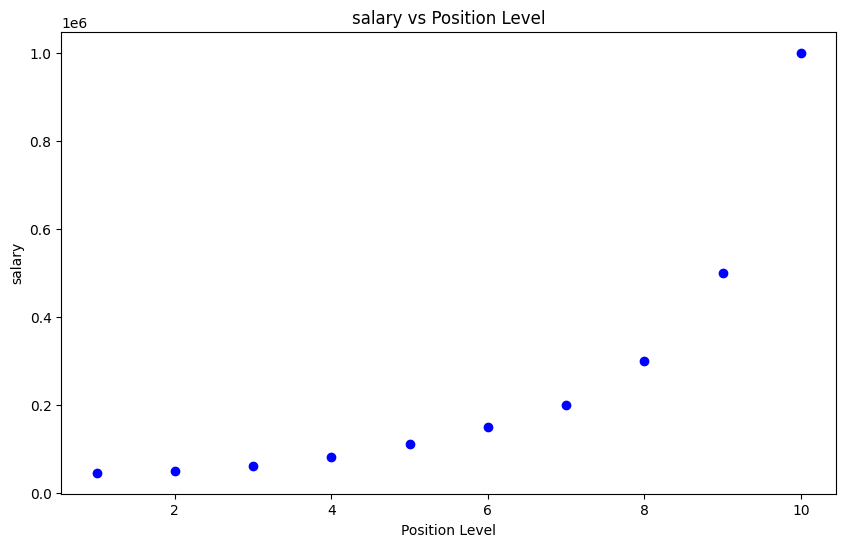

In [ ]:
# realtionship between level and salary
# non linear nature ke data ko polynomial regression se krenge

plt.figure(figsize=(10,6))
plt.scatter(df['Level'],df['Salary'], color='blue')
plt.title('salary vs Position Level')
plt.xlabel('Position Level')
plt.ylabel("salary")
plt.show()

In [80]:
X = df[['Level']]
y = df['Salary']

In [81]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [82]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [83]:
# train the dataset
lr = LinearRegression()
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
# Polynomial regression
pr = PolynomialFeatures(degree=5)
X_poly = pr.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
# predict 
y_pred_poly = lr2.predict(X_poly)
print(y_pred_poly)

y_pred_lr= lr.predict(X)
print(y_pred_poly)

[ 43895.10489603  53836.82983702  57065.26806562  77286.71328733
 112263.40326407 152736.59673704 201349.6503497  291571.0955707
 506617.71561678 998377.62237572]
[ 43895.10489603  53836.82983702  57065.26806562  77286.71328733
 112263.40326407 152736.59673704 201349.6503497  291571.0955707
 506617.71561678 998377.62237572]


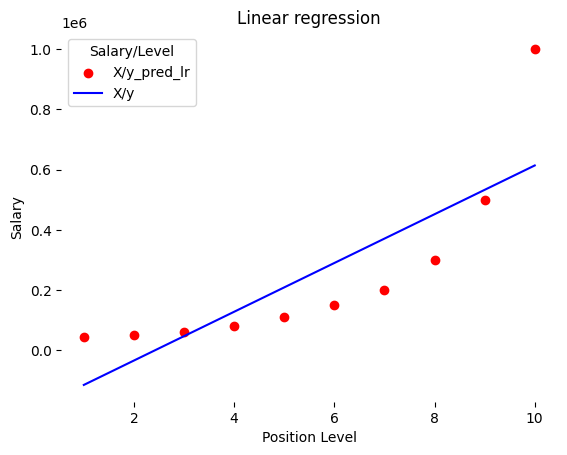

In [86]:
# visualize the linear regression
plt.scatter(X, y, color = 'red')
plt.plot(X,y_pred_lr, color ='blue')
plt.title('Linear regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level',loc='best',facecolor='white')
plt.box(False)
plt.show()

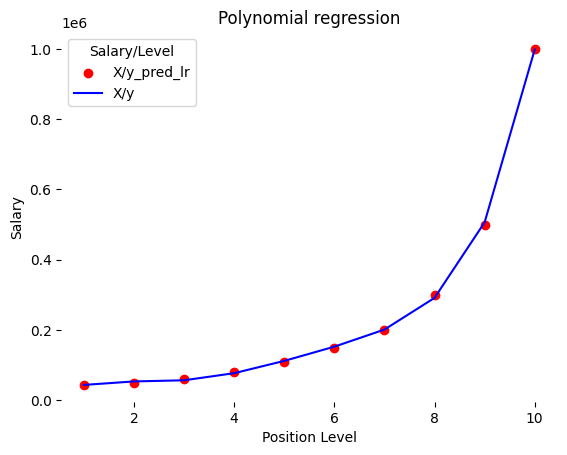

In [87]:
# visualize the linear regression
plt.scatter(X, y, color = 'red')
plt.plot(X,y_pred_poly, color ='blue')
plt.title('Polynomial regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level',loc='best',facecolor='white')
plt.box(False)
plt.show()

In [93]:

print(f'linear reg result:{lr.predict([[6.5]])}')

print(f'Polynomial reg result: {lr2.predict(pr.fit_transform([[6.5]]))}')

linear reg result:[330378.78787879]
Polynomial reg result: [174878.07765177]


c:\Users\HP\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
